<a href="https://colab.research.google.com/github/JeongJeong-code/P6_market_place/blob/main/text_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install "ipython>=7"
!ipython --version
!pip install pycodestyle pycodestyle_magic  # Installation du module de vérification PEP-8
!pip install flake8
%load_ext pycodestyle_magic
%pycodestyle_on

In [29]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from google.colab import files
import pandas as pd
import seaborn as sns
import os.path
import missingno as mi
import re
import sklearn as sk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import KernelPCA
from sklearn.cluster import (AgglomerativeClustering,
                             KMeans, DBSCAN, SpectralClustering)
from sklearn.metrics import davies_bouldin_score, silhouette_score
! {sys.executable} -m pip install ipynb
!pip install  opencv-python==3.4.2.17
!pip install  opencv-contrib-python==3.4.2.17
import cv2 as cv
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem as stem
import string

from google.colab import drive
import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing

from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn import metrics

27:21: E225 missing whitespace around operator
28:28: E225 missing whitespace around operator
29:36: E225 missing whitespace around operator
30:1: E402 module level import not at top of file
31:1: E402 module level import not at top of file
32:1: E402 module level import not at top of file
33:1: E402 module level import not at top of file
35:1: E402 module level import not at top of file
36:1: E402 module level import not at top of file
37:1: E402 module level import not at top of file
38:1: E402 module level import not at top of file
40:1: E402 module level import not at top of file
41:1: E402 module level import not at top of file
42:1: E402 module level import not at top of file
43:1: E402 module level import not at top of file
44:1: E402 module level import not at top of file
45:1: E402 module level import not at top of file
47:1: E402 module level import not at top of file
48:1: E402 module level import not at top of file
49:1: E402 module level import not at top of file
50:1: E40

In [30]:
!python --version

In [31]:

drive.mount('/content/drive')

In [32]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

True

In [33]:
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/df_cat_prime.csv'
df1_test= pd.read_csv(url)
print(len(df1_test))
df1_test =df1_test[df1_test['image'] !='9743e6d1c9f3180483825fe4d2e97836.jpg']
print(len(df1_test))
df1_test.reset_index(inplace=True,drop=True)

1:80: E501 line too long (95 > 79 characters)
2:9: E225 missing whitespace around operator
4:11: E225 missing whitespace around operator
4:40: E225 missing whitespace around operator
6:34: E231 missing whitespace after ','


1:1: W391 blank line at end of file


In [34]:
df1_test.iloc[343]

Unnamed: 0                                                              344
product_name                   Anna Andre Paris Majesty Deodorant Combo Set
image                                  6e44d107ee32412243b19b0ed9b415f3.jpg
product_specifications    {"product_specification"=>[{"key"=>"Number of ...
categories                                         beauty and personal care
description               flipkart anna andre paris majesty deodorant co...
Name: 343, dtype: object

In [35]:
df1_test.info()

In [36]:
lemma = 1

stemmer = stem.PorterStemmer()
lemmatizer = stem.WordNetLemmatizer()
for i in range(len(df1_test)):
    df1_test.description[i] = nltk.word_tokenize(df1_test.description[i])
    if lemma == 1:
        df1_test.description[i] = [lemmatizer.lemmatize(t) for t in
                                   df1_test.description[i]]
    else :
        df1_test.description[i] = [stemmer.stem(t) for t in
                                   df1_test.description[i]]
    df1_test.description[i] = " ".join(df1_test.description[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: ignored

In [37]:
tokenizer = RegexpTokenizer(r'\w+')
tokenize_desc = pd.Series(df1_test.description.str.lower(
                          ).apply(tokenizer.tokenize), name='tokenize_desc')

In [38]:
all_words = [word for tokens in tokenize_desc for word in tokens]
count_all_words = Counter(all_words)
most_common_words = [word for word,
                     word_count in count_all_words.most_common(20)]

In [39]:
words = ', '.join(all_words)

In [40]:
pd.Series(words).value_counts()

feature, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, height, pack, price, this, curtain, enhances, look, interior, this, curtain, made, from, high, quality, polyester, fabric, feature, eyelet, style, stitch, with, metal, ring, make, room, environment, romantic, loving, this, curtain, wrinkle, anti, shrinkage, have, elegant, apparance, give, your, home, bright, modernistic, appeal, with, these, design, surreal, attention, sure, steal, heart, these, contemporary, eyelet, valance, curtain, slide, smoothly, when, draw, them, apart, first, thing, morning, welcome, bright, ray, want, wish, good, morning, whole, world, when, draw, them, close, evening, create, most, special, moment, joyous, beauty, given, soothing, print, bring, home, elegant, curtain, that, softly, filter, light, your, room, that, right, amount, sunlight, specification, elegance, polyester, multicolor, abstract, eyelet, d

In [41]:
pd.Series(all_words).value_counts()

only            888
product         863
with            842
your            655
free            617
               ... 
constructed       1
evotion           1
hgfvscgstgry      1
trusted           1
fushia            1
Length: 4273, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

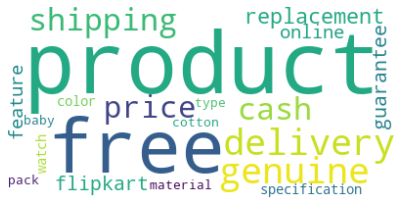

In [42]:

wc = WordCloud(background_color="white", mode="RGBA", max_words=20,
               collocations=False).generate(words)
plt.figure(figsize=[7, 7])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [43]:
stopword_list = nltk.corpus.stopwords.words('english') + most_common_words

(-0.5, 399.5, 199.5, -0.5)

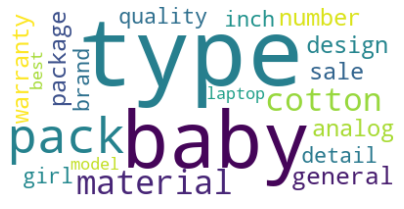

In [44]:
wc_stop = WordCloud(background_color="white", mode="RGBA", max_words=20,
                    collocations=False,
                    stopwords=stopword_list).generate(words)
plt.figure(figsize=[7, 7])
plt.imshow(wc_stop, interpolation="bilinear")
plt.axis("off")

In [45]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(df1_test.categories), name='class_labels')

In [47]:
list_labels = y
list_tokens = tokenize_desc

In [48]:
list_tokens

0       [feature, elegance, polyester, multicolor, abs...
1       [specification, sathiyas, cotton, bath, towel,...
2       [feature, eurospa, cotton, terry, face, towel,...
3       [feature, santosh, royal, fashion, cotton, pri...
4       [feature, jaipur, print, cotton, floral, king,...
                              ...                        
1043    [oren, empower, extra, large, self, adhesive, ...
1044    [wallmantra, large, vinyl, sticker, sticker, p...
1045    [uberlyfe, extra, large, pigmented, polyvinyl,...
1046    [wallmantra, medium, vinyl, sticker, sticker, ...
1047    [uberlyfe, large, vinyl, sticker, online, uber...
Name: tokenize_desc, Length: 1048, dtype: object

In [49]:
X_train = df1_test.description
y_train = y

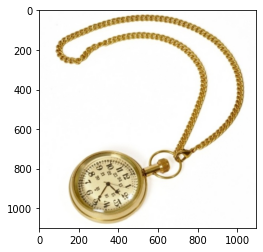

(<matplotlib.image.AxesImage at 0x7f3df2271750>, None)

In [50]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()
name = '9833d0de7f7e1927c807411c10b19189'
img = cv.imread(img_path + '/' + name+'.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img), plt.show()

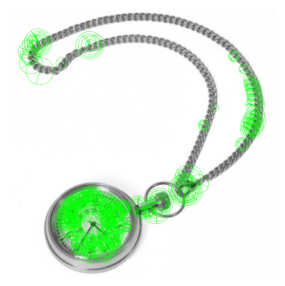

(<matplotlib.image.AxesImage at 0x7f3df2567050>, None)

In [51]:
img = cv.imread(img_path + '/' + name + '.jpg', cv.IMREAD_GRAYSCALE)
orb = cv.ORB_create()
kp, des = orb.detectAndCompute(img, None)
img2 = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=4)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img2), plt.show()

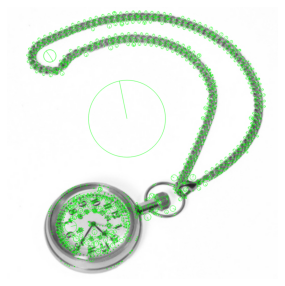

(<matplotlib.image.AxesImage at 0x7f3df0f962d0>, None)

In [52]:
sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img, None)
img3 = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=4)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img3), plt.show()

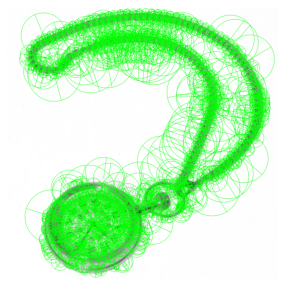

(<matplotlib.image.AxesImage at 0x7f3df0caad50>, None)

In [53]:
surf = cv.xfeatures2d.SURF_create()
kp, des = surf.detectAndCompute(img, None)
img4 = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=4)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img4), plt.show()

In [54]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()
dico = []
prob = []
for leaf in train.image:
    img = cv.imread(img_path + '/' + str(leaf), cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create()
    kp = orb.detect(img, None)
    kp, des = orb.compute(img, kp)
    if len(kp) == 0:
        prob.append(leaf)
        des = []
    for d in des:
        dico.append(d)

In [55]:
k = np.size(labels) * 10
batch_size = np.size(os.listdir(img_path)) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size,
                         verbose=1).fit(dico)

In [56]:
kmeans.verbose = False
histo_list = []
for leaf in train.image:
    img = cv.imread(img_path + '/' + str(leaf) )
    kp, des = orb.detectAndCompute(img, None)
    histo = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly
    histo_list.append(histo)

4:47: E202 whitespace before ')'
10:28: E261 at least two spaces before inline comment
10:80: E501 line too long (100 > 79 characters)


In [57]:
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+',
                                   stop_words=stopword_list)
bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)

In [58]:
X_train_word = count_vectorizer.fit_transform(X_train)

In [59]:
X_train_word_df = pd.DataFrame.sparse.from_spmatrix(X_train_word)
X_train_image = pd.DataFrame(histo_list)
X = pd.concat([X_train_word_df, X_train_image], axis=1)

In [60]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


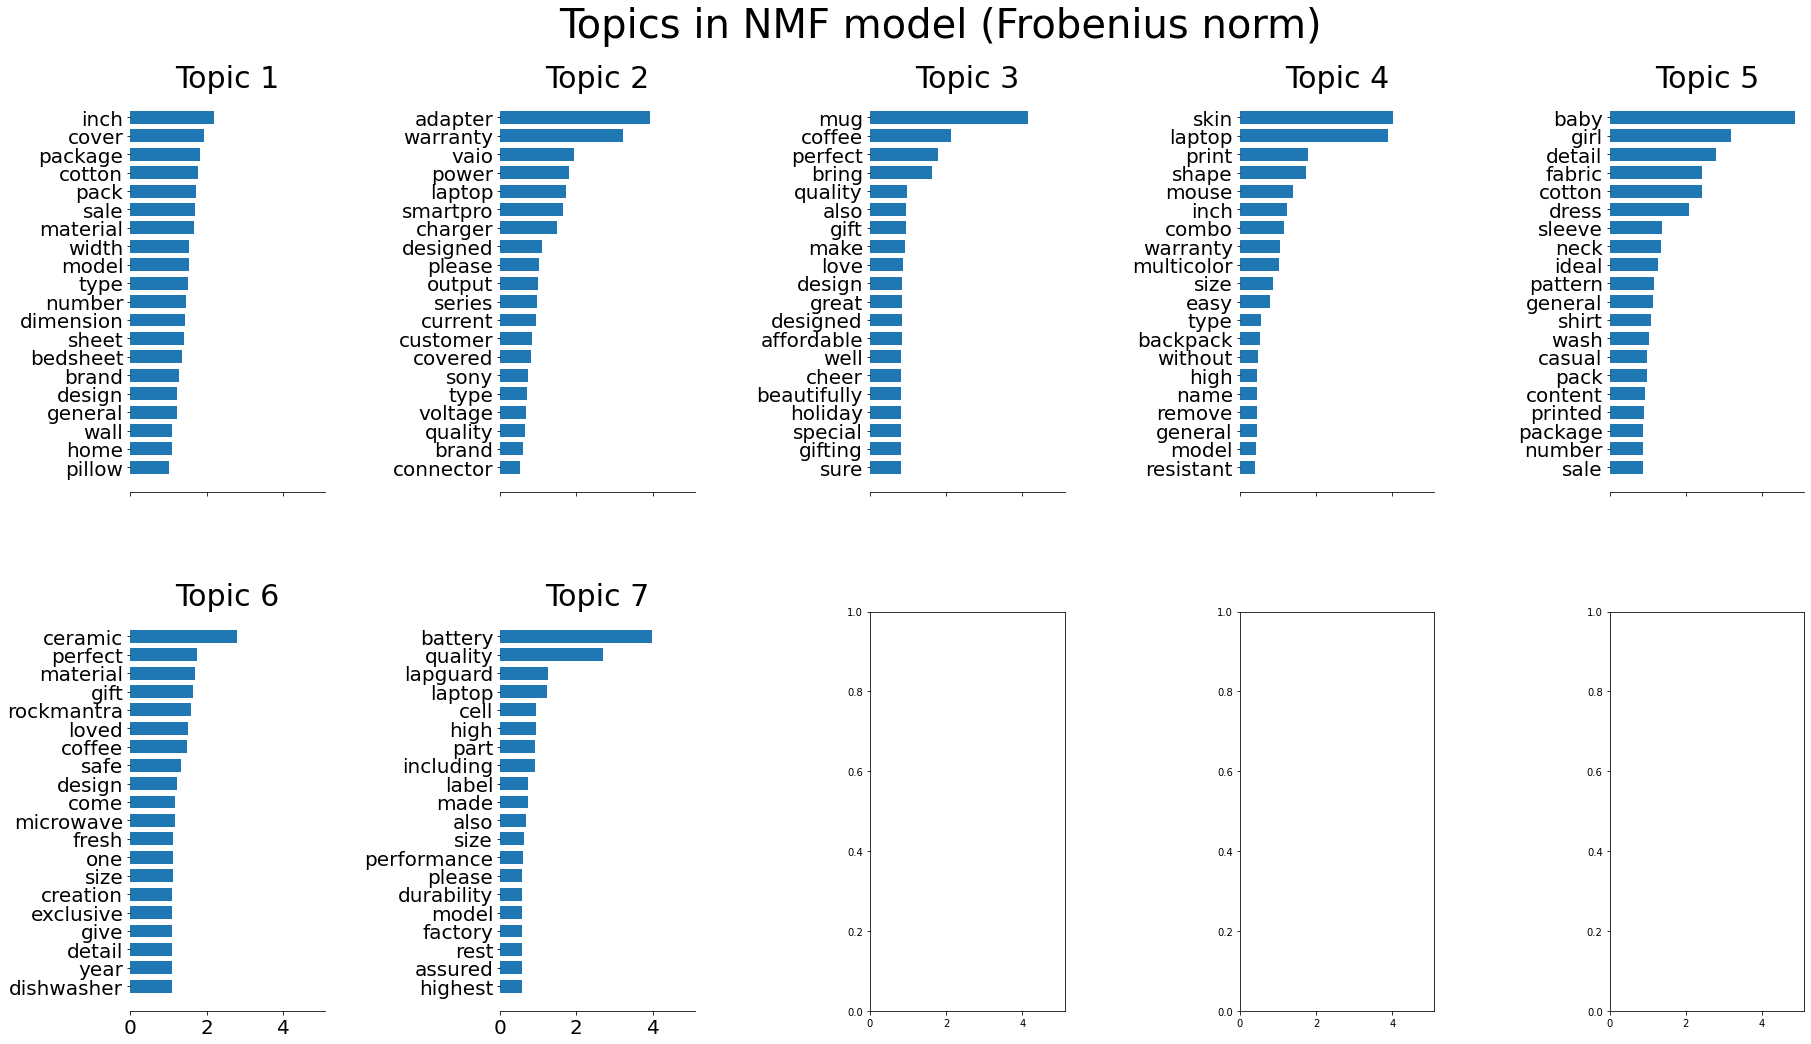

In [61]:
n_components = 7
n_top_words = 20
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1,
          l1_ratio=0.5).fit(X_train_word)
tfidf_feature_names = count_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words,
    "Topics in NMF model (Frobenius norm)")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


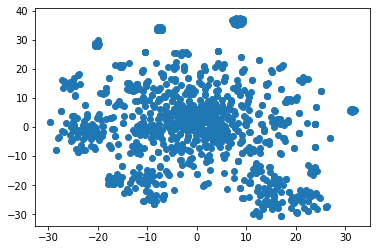

In [62]:
tsne_2d = TSNE(n_components=2, perplexity=50)
X_tsne = tsne_2d.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [63]:
np.shape(X_tsne)

(1048, 2)

In [64]:
lr = LogisticRegression()
svc = SVC()
gb = GaussianNB()
nb = MultinomialNB()
cross_val_score(gb, X, y_train, cv=5, scoring='accuracy', error_score='raise')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.80952381, 0.86190476, 0.86666667, 0.76076555, 0.68899522])

In [65]:
cross_val_score(lr, X, y_train, cv=5, scoring='accuracy', error_score='raise')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.93809524, 0.97619048, 0.9       , 0.72727273, 0.72248804])

In [66]:
cross_val_score(svc, X, y_train, cv=5, scoring='accuracy', error_score='raise')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.77142857, 0.82857143, 0.80952381, 0.61244019, 0.58373206])

In [67]:
labels_ = gb.fit(X_tsne, y_train).predict(X_tsne)
gb_labels = pd.Series(labels_)

In [68]:
df1_test.categories.nunique()

7

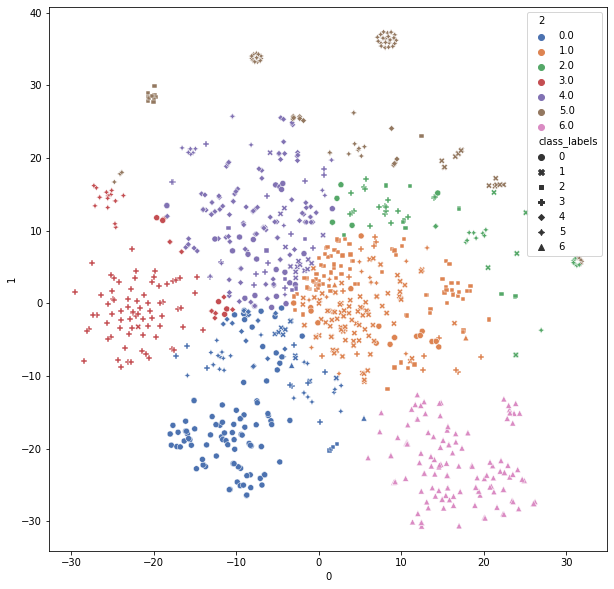

In [69]:
results = np.c_[X_tsne, labels_]
pd_result = pd.DataFrame(results)
pd_result = pd.concat([pd_result, pd.Series(y_train)], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pd_result[0], y=pd_result[1], hue=pd_result[2],
                style=pd_result.class_labels, palette='deep')

In [70]:
pd.crosstab(pd_result[2], pd_result.class_labels)

class_labels,0,1,2,3,4,5,6
2,,,,,,,
0.0,98,12,5,10,18,25,2
1.0,18,97,105,16,0,15,2
2.0,5,11,16,22,3,18,0
3.0,5,1,0,84,10,16,0
4.0,24,15,10,17,107,21,0
5.0,0,14,13,0,12,55,0
6.0,0,0,0,0,0,0,146


In [71]:
pd.crosstab(y_train, gb_labels)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,98,18,5,5,24,0,0
1,12,97,11,1,15,14,0
2,5,105,16,0,10,13,0
3,10,16,22,84,17,0,0
4,18,0,3,10,107,12,0
5,25,15,18,16,21,55,0
6,2,2,0,0,0,0,146


In [72]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+',
                                   stop_words=stopword_list)
tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)

In [73]:
nb_classifier = MultinomialNB()
nb_classifier.fit(*bow["train"])
cross_val_score(nb_classifier, *bow["train"], cv=5, scoring='accuracy')

array([0.87619048, 0.95714286, 0.90952381, 0.74162679, 0.77511962])

In [74]:
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(*tfidf["train"])
cross_val_score(nb_classifier_tfidf, *tfidf["train"], cv=5, scoring='accuracy')

array([0.92857143, 0.97142857, 0.91428571, 0.72727273, 0.80382775])

Implémentation Kmeans


In [75]:
kmeans = KMeans()

In [76]:
X_pca = KernelPCA(n_components=2).fit_transform(X)
kmeans_pca = KMeans(n_clusters=df1_test.categories.nunique()).fit(X_pca)
pd.crosstab(index=y_train, columns=kmeans_pca.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,43,58,0,0,21,0,28
1,130,0,1,0,19,0,0
2,99,0,23,6,21,0,0
3,105,9,2,0,33,0,0
4,92,24,0,0,28,0,6
5,109,0,0,0,30,11,0
6,144,0,0,0,6,0,0


In [77]:
X_spca = SparsePCA(n_components=2).fit_transform(X)
kmeans_spca = KMeans(n_clusters=df1_test.categories.nunique()).fit(X_spca)
pd.crosstab(index=y_train, columns=kmeans_spca.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,24,35,40,0,0,0,51
1,22,0,126,0,0,2,0
2,19,0,101,7,6,16,0
3,39,0,107,0,0,2,1
4,38,6,90,0,0,0,16
5,36,0,114,0,0,0,0
6,10,0,140,0,0,0,0


In [78]:
kmeans = KMeans(n_clusters=df1_test.categories.nunique()).fit(X_tsne)

In [79]:
pd.crosstab(index=y_train, columns=kmeans.labels_)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,8,37,0,13,4,3,85
1,31,106,0,3,1,8,1
2,52,72,3,12,0,5,5
3,14,18,0,5,88,19,5
4,3,36,0,66,12,28,5
5,26,19,0,34,11,50,10
6,1,2,147,0,0,0,0


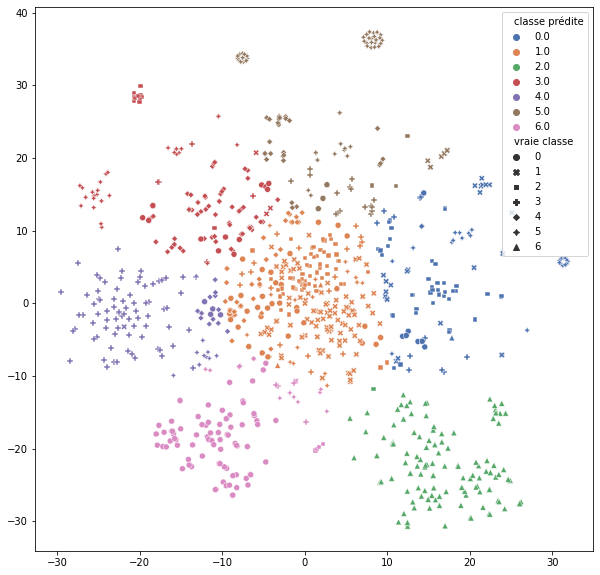

ValueError: ignored

In [80]:
results_kmeans = np.c_[X_tsne, kmeans.labels_]
pd_result_kmeans = pd.DataFrame(results_kmeans)
pd_result_kmeans = pd.concat([pd_result_kmeans, pd.Series(y_train)], axis=1)
pd_result_kmeans.rename(columns={2:'classe prédite',
                                 'class_labels':'vraie classe'}, inplace = True)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],
                hue=pd_result_kmeans['classe prédite'],
                style=pd_result_kmeans['vraie classe'], palette ='deep')

0.4178198379878693

(0.39785254948930693, 0.4115150297653792, 0.404568475292992)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


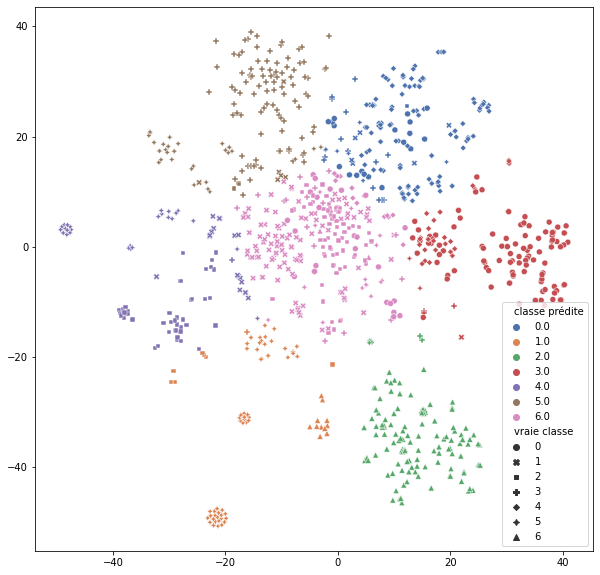

2:80: E501 line too long (81 > 79 characters)
5:80: E501 line too long (88 > 79 characters)


ValueError: ignored

In [88]:
X_tsne_words = TSNE(n_components=2).fit_transform(X_train_word)
kmeans_words = KMeans(n_clusters=df1_test.categories.nunique()).fit(X_tsne_words)
results_kmeans_words = np.c_[X_tsne_words, kmeans_words.labels_]
pd_result_kmeans_words = pd.DataFrame(results_kmeans_words)
pd_result_kmeans_words = pd.concat([pd_result_kmeans_words, pd.Series(y_train)], axis=1)
pd_result_kmeans_words.rename(columns={2:'classe prédite',
                                 'class_labels':'vraie classe'}, inplace = True)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne_words[:,0],y=X_tsne_words[:,1],
                hue=pd_result_kmeans_words['classe prédite'],
                style=pd_result_kmeans_words['vraie classe'], palette ='deep')

In [89]:
display(metrics.fowlkes_mallows_score(pd_result_kmeans_words['vraie classe'],
                                      pd_result_kmeans_words['classe prédite']))
display(metrics.homogeneity_completeness_v_measure(
        pd_result_kmeans_words['vraie classe'],
        pd_result_kmeans_words['classe prédite']))

0.49449209103758207

(0.4989793470745199, 0.5153889459998874, 0.5070514161774665)

2:80: E501 line too long (80 > 79 characters)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


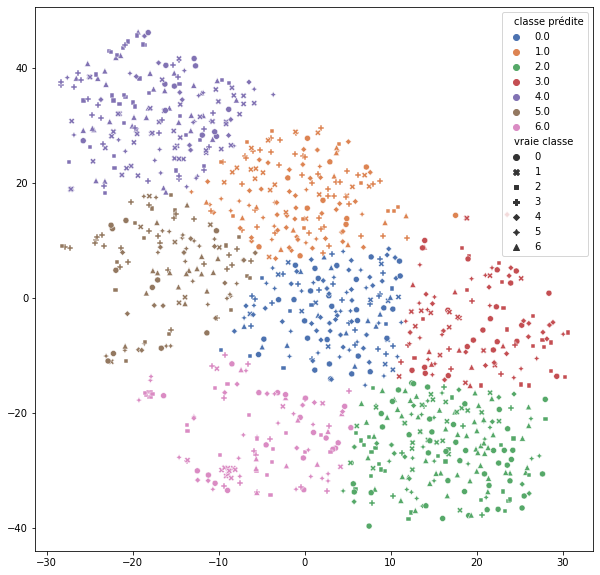

2:80: E501 line too long (81 > 79 characters)
5:80: E501 line too long (88 > 79 characters)


ValueError: ignored

In [90]:
X_tsne_image = TSNE(n_components=2).fit_transform(X_train_image)
kmeans_image = KMeans(n_clusters=df1_test.categories.nunique()).fit(
                      X_tsne_image)
results_kmeans_image = np.c_[X_tsne_image, kmeans_image.labels_]
pd_result_kmeans_image = pd.DataFrame(results_kmeans_image)
pd_result_kmeans_image = pd.concat([pd_result_kmeans_image, pd.Series(y_train)],
                                   axis=1)
pd_result_kmeans_image.rename(columns={2:'classe prédite',
                                 'class_labels':'vraie classe'}, inplace = True)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne_image[:,0],y=X_tsne_image[:,1],
                hue=pd_result_kmeans_image['classe prédite'],
                style=pd_result_kmeans_image['vraie classe'], palette ='deep')

In [92]:
display(metrics.fowlkes_mallows_score(pd_result_kmeans_image['vraie classe'],
                                      pd_result_kmeans_image['classe prédite']))
display(metrics.homogeneity_completeness_v_measure(
        pd_result_kmeans_image['vraie classe'],
        pd_result_kmeans_image['classe prédite']))

0.17431719741062918

(0.055424850743413835, 0.056117533667793686, 0.0557690414104766)

2:80: E501 line too long (80 > 79 characters)
